<a href="https://colab.research.google.com/github/Amolrakhunde/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
directory_path = '/content/drive/MyDrive/Alma Better/EDA Projects/Hotel Booking Analysis/'
df = pd.read_csv(directory_path + 'Hotel Bookings.csv')

In [5]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Looking for missing data and dealing with it**

In [6]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# we have four columns with missing data, lets handel all missings value from each column

In [8]:
# filling all na values with 0 in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].fillna(0.0)

In [9]:
# filling all na values from country with mode of non na values from country column
df['country'].fillna(df['country'].mode().to_string(), inplace=True)

In [10]:
# Check for missing values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Yeah! We are done with handelling missing data.

**Looking for datatype changes in columns**

In [11]:
# changing datatype from float to int in column: children, agent and company
df[['children','agent','company']] = df[['children','agent','company']].astype(int)

In [12]:
# getting reservation_status_date in proper datetime datatype
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
# Check for datatypes of all column as required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

**Going through each column and working each categories inside column and finding relation with bookings**

**Column:** hotel

In [14]:
categories_in_hotel = df.hotel.unique()
print(categories_in_hotel)

['Resort Hotel' 'City Hotel']


In [15]:
df.hotel = df.hotel.str.replace(' ','_')

Text(0.5, 1.0, 'Types of Hotel')

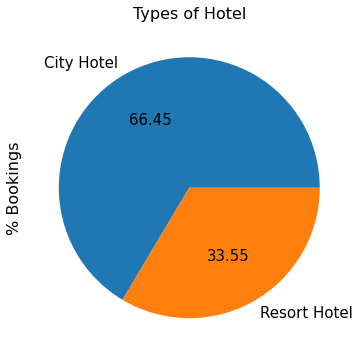

In [16]:
df.groupby('hotel').size().plot(kind='pie', labels=["City Hotel", "Resort Hotel"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('% Bookings' , fontsize=16)
plt.title('Types of Hotel', fontsize=16)

**Conclusion:** There is almost double bookings in City Hotel as compared to Resort Hotel.

**Column:** is_canceled

In [17]:
categories_in_is_canceled = df.is_canceled.unique()
print(categories_in_is_canceled)

[0 1]


0 for Booking Not Canceled;
1 for Booking Canceled OR No Show

In [18]:
# replace 0 by Not canceled and 1 by Canceled
df.is_canceled = df.is_canceled.replace(0,'Not_Canceled').replace(1, 'Canceled')

Text(0.5, 1.0, 'Bookings Cancelation Status')

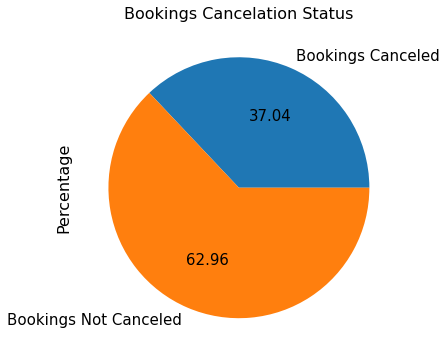

In [19]:
df.groupby('is_canceled').size().plot(kind='pie', labels=["Bookings Canceled", "Bookings Not Canceled"], fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Percentage' , fontsize=16)
plt.title('Bookings Cancelation Status', fontsize=16)

**Conclusion:** 37% of bookings gets canceled.

**Column:** lead_time

Booking **Lead Time** is the period of time between when a guest makes a reservation, and the actual check-in date

Lead time will be zero for same day booking

In [20]:
same_day_booking= round(df['lead_time'].value_counts(normalize=True) * 100, 2)[0]
print(f"Same day bookings are {same_day_booking}%")
within_week_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[1:8].sum(), 0)
print(f"Within a week bookings are {within_week_booking}%")
within_month_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:31].sum(), 0)
print(f"Within a month bookings are {within_month_booking}%")
within_3_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:91].sum(), 0)
print(f"Within 3 months bookings are {within_3_months_booking}%")
within_6_months_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:181].sum(), 0)
print(f"Within 6 months bookings are {within_6_months_booking}%")
within_year_booking= round((df['lead_time'].value_counts(normalize=True) * 100)[0:366].sum(), 0)
print(f"Within a year bookings are {within_year_booking}%")

Same day bookings are 5.31%
Within a week bookings are 11.0%
Within a month bookings are 33.0%
Within 3 months bookings are 58.0%
Within 6 months bookings are 80.0%
Within a year bookings are 98.0%


In [22]:
median_lead_time = round(df[df['lead_time'] != 0]['lead_time'].median(), 0)
print(f"Median lead time for bokings {int(median_lead_time)} days")

Median lead time for bokings 76 days


**Conlusion:**
1. 5.31% bookings are same day booking which means that people prefers to book hotel earlier.

2. Almost 60% of bookings are done within 90 days of arrival.

**Column:** arrival_date_year

Text(0.5, 1.0, 'Year WIse Bookings')

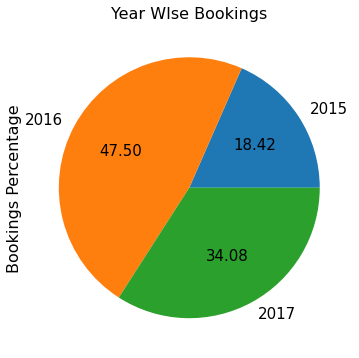

In [23]:
df.groupby('arrival_date_year').size().plot(kind='pie', fontsize=15, autopct='%.2f',  figsize=(6, 6))
plt.ylabel('Bookings Percentage' , fontsize=16)
plt.title('Year WIse Bookings', fontsize=16)

**Column:** arrival_date_month

Text(0.5, 1.0, 'Monthly Bookings count')

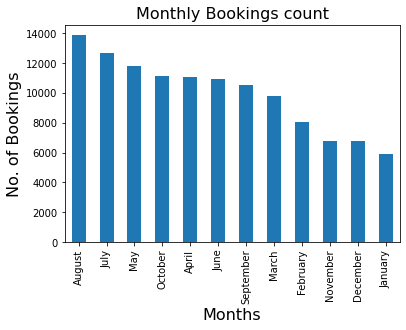

In [32]:
df['arrival_date_month'].value_counts().plot(kind='bar')
plt.xlabel('Months' , fontsize=16)
plt.ylabel('No. of Bookings' , fontsize=16)
plt.title('Monthly Bookings count', fontsize=16)

**Conclusion:**
1. Highest hotel bookings are in month August.
2. Lowest hotel bookings are in month January.

**Column:** arrival_date_week_number

In [33]:
round(df['arrival_date_week_number'].value_counts(normalize=True) * 100, 2).sort_index()

1     0.88
2     1.02
3     1.10
4     1.25
5     1.16
6     1.26
7     1.77
8     1.86
9     1.77
10    1.80
11    1.73
12    1.74
13    2.02
14    1.90
15    2.25
16    2.01
17    2.35
18    2.45
19    2.01
20    2.33
21    2.39
22    2.13
23    2.20
24    2.09
25    2.23
26    2.00
27    2.23
28    2.39
29    2.31
30    2.59
31    2.30
32    2.55
33    3.00
34    2.55
35    2.17
36    1.82
37    1.87
38    2.23
39    2.16
40    2.01
41    2.26
42    2.31
43    1.97
44    1.90
45    1.63
46    1.32
47    1.41
48    1.26
49    1.49
50    1.26
51    0.78
52    1.00
53    1.52
Name: arrival_date_week_number, dtype: float64

Text(0, 0.5, 'No. of bookings')

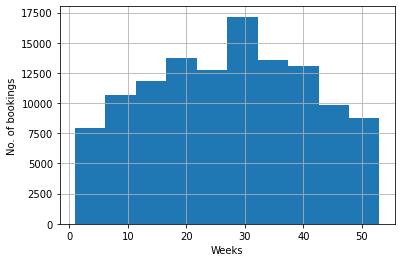

In [34]:
df.arrival_date_week_number.hist();
plt.xlabel('Weeks')
plt.ylabel('No. of bookings')

**Conclusion:**
1. Highest hotel bookings are in week 33.
2. Lowest hotel bookings are in week 51.

**Column:** arrival_date_day_of_month

In [27]:
categories_in_arrival_date_day_of_month = df.arrival_date_day_of_month.unique()
print(categories_in_arrival_date_day_of_month)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [30]:
round(df['arrival_date_day_of_month'].value_counts(normalize=True) * 100, 2).sort_index()

1     3.04
2     3.40
3     3.23
4     3.15
5     3.62
6     3.21
7     3.07
8     3.28
9     3.43
10    2.99
11    3.01
12    3.42
13    3.14
14    3.20
15    3.51
16    3.42
17    3.69
18    3.35
19    3.39
20    3.38
21    3.16
22    3.01
23    3.03
24    3.34
25    3.48
26    3.47
27    3.18
28    3.31
29    3.00
30    3.23
31    1.85
Name: arrival_date_day_of_month, dtype: float64

**Column:** stays_in_weekend_nights

In [29]:
round(df['stays_in_weekend_nights'].value_counts(normalize=True) * 100, 2)

0     43.55
2     27.90
1     25.65
4      1.55
3      1.05
6      0.13
5      0.07
8      0.05
7      0.02
9      0.01
10     0.01
12     0.00
13     0.00
16     0.00
14     0.00
18     0.00
19     0.00
Name: stays_in_weekend_nights, dtype: float64

**Column:**stays_in_week_nights

In [30]:
round(df['stays_in_week_nights'].value_counts(normalize=True) * 100, 2)

2     28.21
1     25.39
3     18.64
5      9.28
4      8.01
0      6.40
6      1.26
10     0.87
7      0.86
8      0.55
9      0.19
15     0.07
11     0.05
19     0.04
12     0.04
20     0.03
14     0.03
13     0.02
16     0.01
21     0.01
22     0.01
18     0.01
25     0.01
30     0.00
17     0.00
24     0.00
40     0.00
42     0.00
26     0.00
32     0.00
33     0.00
34     0.00
35     0.00
41     0.00
50     0.00
Name: stays_in_week_nights, dtype: float64

**Column:**adults

In [54]:
round(df['adults'].value_counts(normalize=True) * 100, 2)

2     75.12
1     19.29
3      5.19
0      0.34
4      0.05
26     0.00
27     0.00
20     0.00
5      0.00
55     0.00
50     0.00
40     0.00
10     0.00
6      0.00
Name: adults, dtype: float64

**Column:**children

In [55]:
round(df['children'].value_counts(normalize=True) * 100, 2)

0     92.81
1      4.07
2      3.06
3      0.06
10     0.00
Name: children, dtype: float64

**Column:**babies

In [56]:
round(df['babies'].value_counts(normalize=True) * 100, 2)

0     99.23
1      0.75
2      0.01
10     0.00
9      0.00
Name: babies, dtype: float64

**Column:** meal

In [57]:
round(df['meal'].value_counts(normalize=True) * 100, 2)

BB           77.32
HB           12.11
SC            8.92
Undefined     0.98
FB            0.67
Name: meal, dtype: float64

- BB: Bed & Breakfast

- HB: Half Board (Breakfast and Dinner normally)

- FB: Full Board (Beakfast, Lunch and Dinner)

- SC: Self Catering

**Column:** country

In [66]:
max_bookings_country = round(df['country'].value_counts(normalize=True) * 100, 2).index[0]

In [67]:
print(f"Country which has highest number of bookings was {max_bookings_country }")

Country which has highest number of bookings was PRT


**Column:** market_segment

In [68]:
round(df['market_segment'].value_counts(normalize=True) * 100, 2)

Online TA        47.30
Offline TA/TO    20.29
Groups           16.59
Direct           10.56
Corporate         4.44
Complementary     0.62
Aviation          0.20
Undefined         0.00
Name: market_segment, dtype: float64

**Conclusion:**

Maximum bookings are from Online TA (Travel Agent) which 47.30%.

Bookings with Online TA and Offline TA/TO is almost 70% that means maximum hotel are booked with agents only.

Direct bookings are 10.56% which shows that maximum people do not have tendacy of booking at hotel.

**Column:** distribution_channel

In [69]:
round(df['distribution_channel'].value_counts(normalize=True) * 100, 2)

TA/TO        81.98
Direct       12.27
Corporate     5.59
GDS           0.16
Undefined     0.00
Name: distribution_channel, dtype: float64

**Conclusion:**

Hotels prefers TA/TO as their Distribution Channel which is maximum with 82%.

**Column:** is_repeated_guest

In [72]:
round(df['is_repeated_guest'].value_counts(normalize=True) * 100, 2)

0    96.81
1     3.19
Name: is_repeated_guest, dtype: float64

0 : guest not repeated

1 : guest repeated

**Column:** reserved_room_type

In [75]:
round(df['reserved_room_type'].value_counts(normalize=True) * 100, 2)

A    72.03
D    16.08
E     5.47
F     2.43
G     1.75
B     0.94
C     0.78
H     0.50
P     0.01
L     0.01
Name: reserved_room_type, dtype: float64

**Column:** booking_changes

In [77]:
round(df['booking_changes'].value_counts(normalize=True) * 100, 2)

0     84.86
1     10.64
2      3.19
3      0.78
4      0.31
5      0.10
6      0.05
7      0.03
8      0.01
9      0.01
10     0.01
13     0.00
14     0.00
15     0.00
11     0.00
12     0.00
16     0.00
17     0.00
20     0.00
18     0.00
21     0.00
Name: booking_changes, dtype: float64

**Conclusion:**

About 85% of bookings never changed.

**Column:** deposit_type

In [78]:
round(df['deposit_type'].value_counts(normalize=True) * 100, 2)

No Deposit    87.65
Non Refund    12.22
Refundable     0.14
Name: deposit_type, dtype: float64

**Conclusion:**

About 88% bookings are without any deposit. (Flexibility to cancel or change bookings without losing any money must be the main reason)

About 12.22% bookings are non refundable.(Those bookings might be done because of offer of lower prices than bookings without any deposit)

Column: 

In [82]:
round(df['days_in_waiting_list'].value_counts(normalize=True) * 100, 2)

0      96.90
39      0.19
58      0.14
44      0.12
31      0.11
       ...  
175     0.00
117     0.00
89      0.00
92      0.00
183     0.00
Name: days_in_waiting_list, Length: 128, dtype: float64

**Conclusion:**

Almost for 97% bookings there is no waiting list.(Which means that confirmed bookings are mostly prefered)

**Column:** customer_type

In [86]:
round(df['customer_type'].value_counts(normalize=True) * 100, 2)

Transient          75.06
Transient-Party    21.04
Contract            3.41
Group               0.48
Name: customer_type, dtype: float64

Transient customer means a customer who is temporarily traveling through other than permanent area.

**Column**: adr

In [90]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

adr for some rows zero and even negative also and in some cases it is very low.

adr can not be negative or zero.


In [102]:
# replace all the adr values which are less than 50.0 with 50.0
df.loc[df['adr'] < 50.0, 'adr'] = 50.0

In [104]:
df['adr'].describe()

count    119390.000000
mean        103.567228
std          48.090455
min          50.000000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Max value very much higher than 75% value, need to replace this outlier

In [117]:
second_max_adr = sorted(df['adr'], reverse=True)[1]
print(second_max_adr)

510.0


In [118]:
# replacing max value by max of remaining rows in that column
df.loc[df['adr'] == df['adr'].max(), 'adr'] = second_max_adr

In [119]:
df['adr'].describe()

count    119390.000000
mean        103.526270
std          45.597248
min          50.000000
25%          69.290000
50%          94.575000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

**Column:** required_car_parking_spaces

In [106]:
round(df['required_car_parking_spaces'].value_counts(normalize=True) * 100, 2)

0    93.79
1     6.18
2     0.02
3     0.00
8     0.00
Name: required_car_parking_spaces, dtype: float64

**Column:** total_of_special_requests

In [107]:
round(df['total_of_special_requests'].value_counts(normalize=True) * 100, 2)

0    58.90
1    27.83
2    10.86
3     2.09
4     0.28
5     0.03
Name: total_of_special_requests, dtype: float64

**Column:** reservation_status

In [108]:
round(df['reservation_status'].value_counts(normalize=True) * 100, 2)

Check-Out    62.96
Canceled     36.03
No-Show       1.01
Name: reservation_status, dtype: float64

In [7]:
df[df['adults'] > 3].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,Check-Out,2015-07-05
354,Resort Hotel,0,0,2015,July,29,13,1,1,4,0.0,0,BB,PRT,Direct,Direct,0,0,0,L,H,0,No Deposit,NaN,NaN,0,Transient,150.0,0,0,Check-Out,2015-07-15
1023,Resort Hotel,1,95,2015,August,33,10,2,5,4,0.0,0,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,NaN,NaN,0,Transient,190.0,0,0,Canceled,2015-06-26
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


In [105]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,50.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,50.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03
